# Loan Application Status Prediction project

In [160]:
import pandas as pd
import numpy as np

In [58]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


here we can see there are 614 rows and 13 features in the dataset.

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

In [59]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

A lot of missing values are there in the data set . In the next step we have to remove some unimportant collumns and missing values.

In [60]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [61]:
df['Loan_Amount_Term'].replace(np.nan, df["Loan_Amount_Term"].mean(axis=0), inplace=True)

In [62]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [63]:
df['Gender'].replace(np.nan,'Male', inplace=True)

In [64]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [65]:
df['Dependents'].replace(np.nan, '0', inplace=True)

In [66]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [67]:
df['Self_Employed'].replace(np.nan, 'No', inplace=True)

In [68]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [69]:
df['LoanAmount'].replace(np.nan, df["LoanAmount"].mean(axis=0), inplace=True)

In [70]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [72]:
df['Credit_History'].replace(np.nan, 1.0, inplace=True)

In [89]:
df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [73]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

here we can see that our target variable data set is not balanced so we have to balance the dataset.

In [74]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [75]:
df['Married'].replace(np.nan, 'Yes', inplace=True)

In [76]:
df.drop(["Loan_ID"],axis = 1, inplace=True)

In [77]:
df.shape

(614, 12)

In [78]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

here we can see that we have revomed all missing values in the dataset.

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

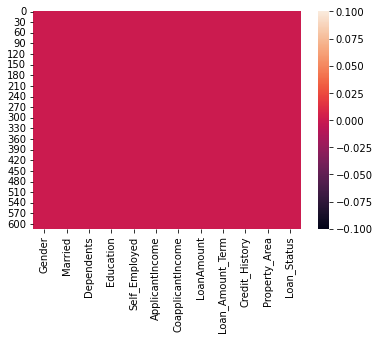

In [80]:
sns.heatmap(df.isnull())

here we can see that there is no missing values in the dataset now.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


here we can see that maximum collumns are object collumns so we have to encode the data .

now we will be using some univariate , bivariate and multivariate analysis . 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

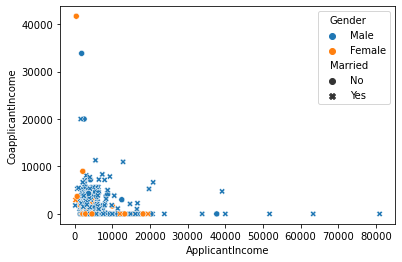

In [93]:
sns.scatterplot(x="ApplicantIncome" ,y="CoapplicantIncome",hue="Gender",style="Married" ,data=df)

here we can see that maximum persons are male ,and maximum persons are married with high income.

In [82]:
df1=df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount"],axis=1)

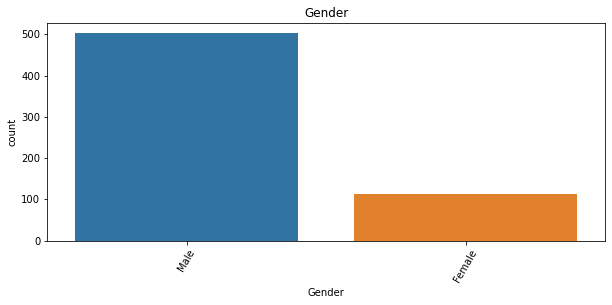

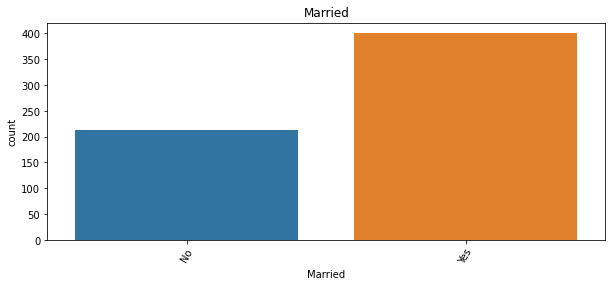

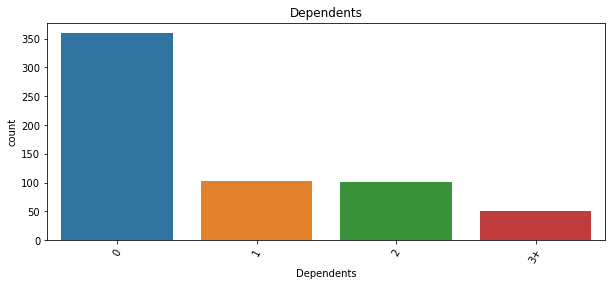

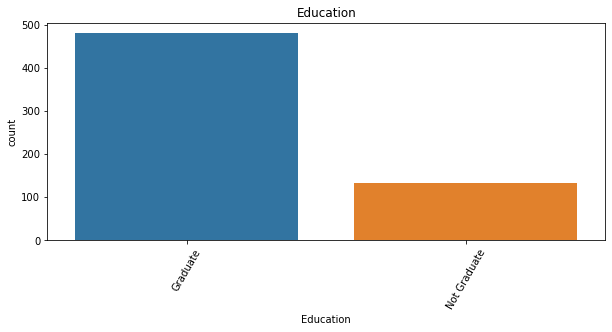

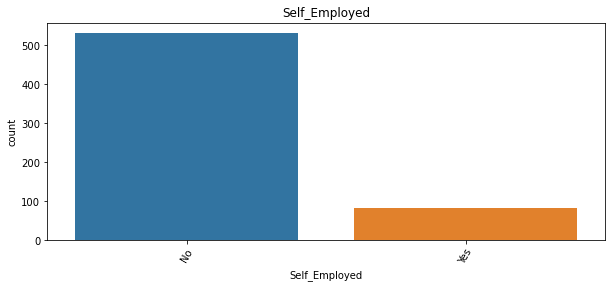

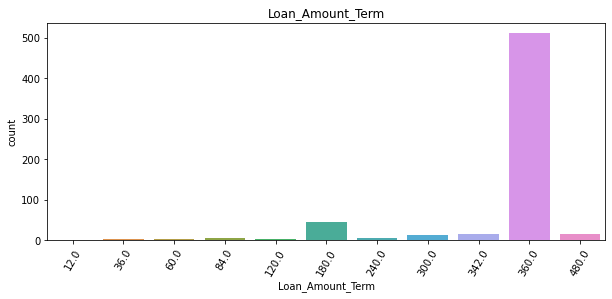

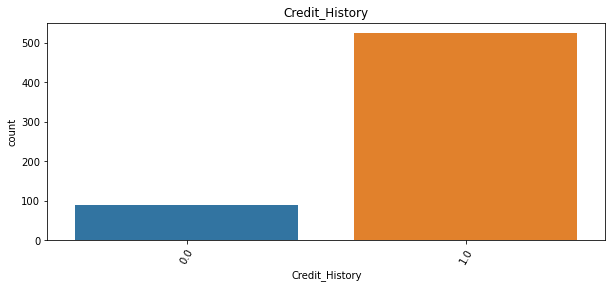

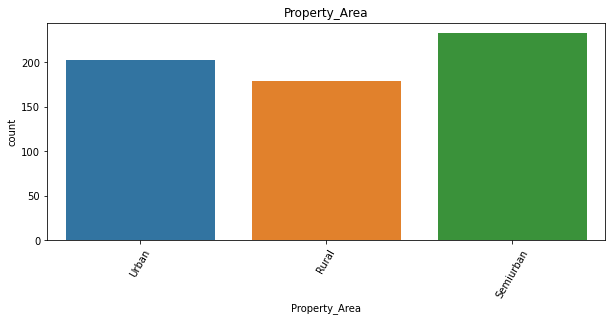

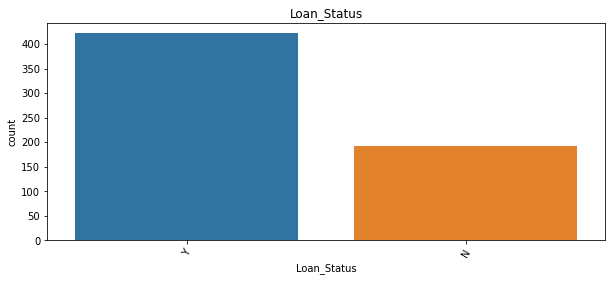

In [83]:
for col in df1.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.countplot(df1[col])
    plt.title(col)
    plt.xticks(rotation=60)
    plt.show()

here we have done univariate analysis.

1.maximum loan applicants are male.

2.maximum loan applicants are married.

3.maximum loan applicants' dependents is 0 .

4.maximum loan applicants are graduate .

5.maximum loan applicants are not self employed

6.maximum loan ammount term is 360 , then 180 ,, and then minimum term is 12 .

7.maximum loan applicants'credit history is 1.0 .

8.maximum loan applicants have their property area in semiurban are .

9.maximum loan applicants' loan status is yes .

6.539513113994625

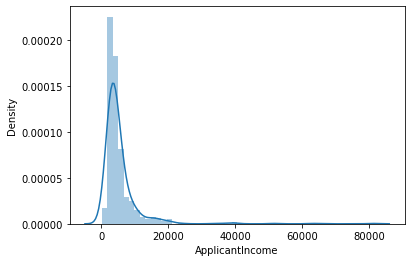

In [84]:
sns.distplot(df["ApplicantIncome"])
df["ApplicantIncome"].skew()

7.491531216657306

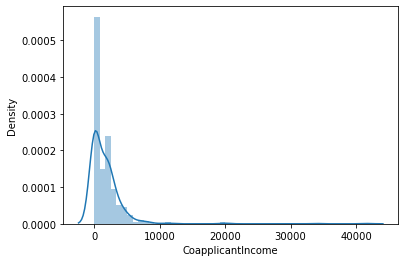

In [85]:
sns.distplot(df["CoapplicantIncome"])
df["CoapplicantIncome"].skew()

2.726601144105299

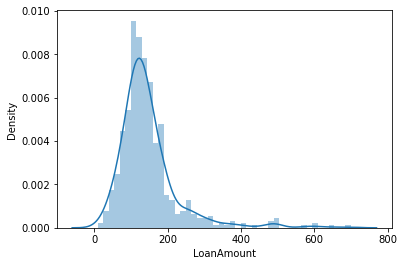

In [86]:
sns.distplot(df["LoanAmount"])
df["LoanAmount"].skew()

In [87]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


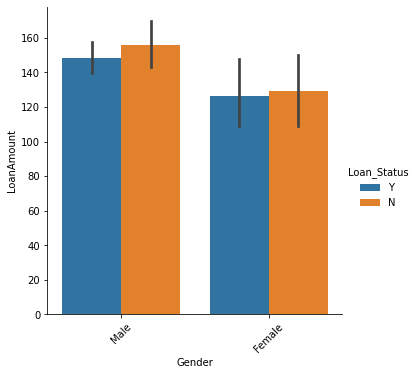

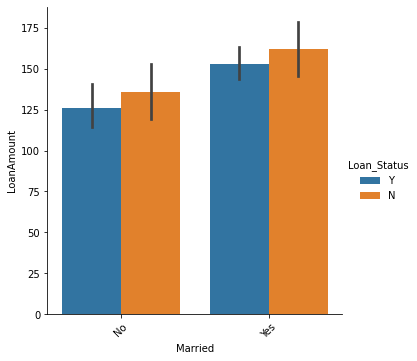

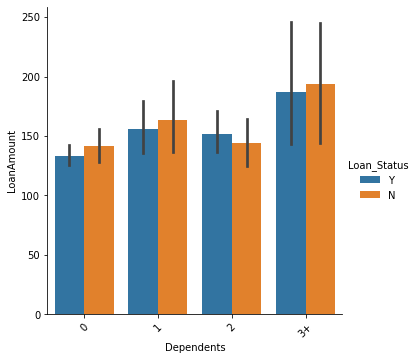

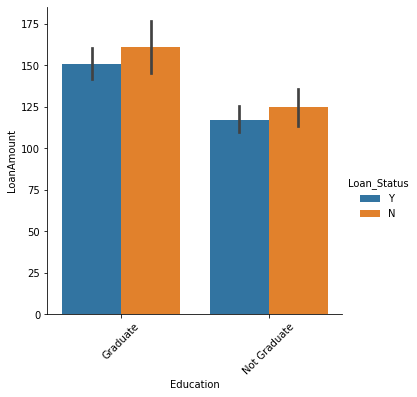

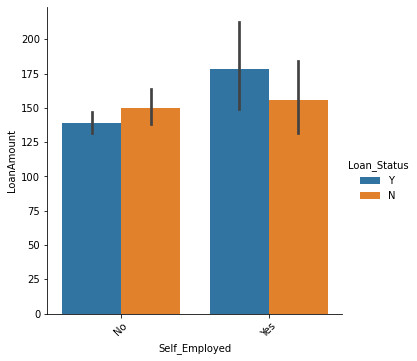

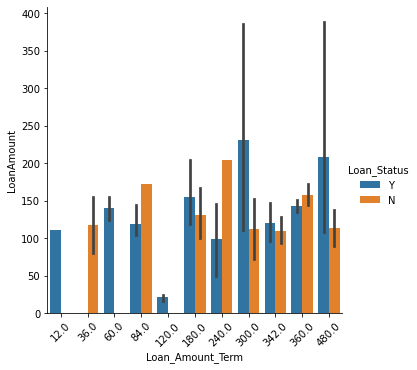

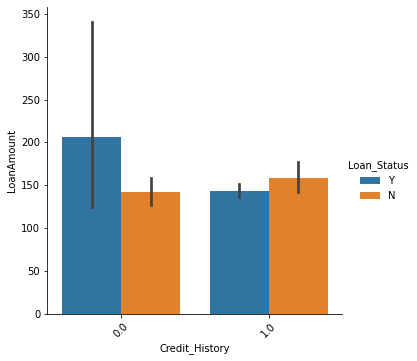

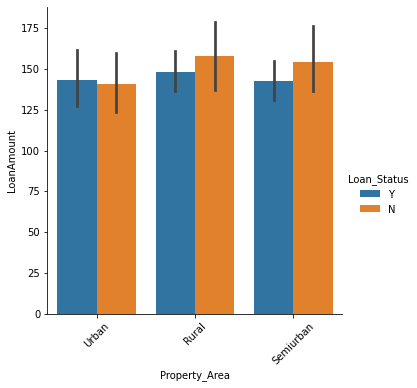

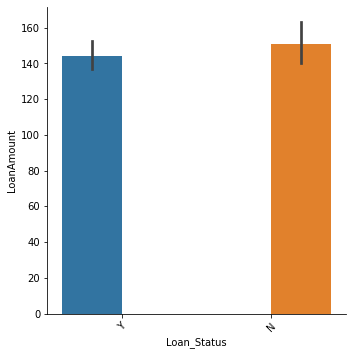

In [88]:
for col in df1.columns:
    sns.catplot(x=col,y='LoanAmount',hue="Loan_Status",data=df,kind="bar")
    plt.xticks(rotation=45)

here we have done multivariate analysis 

1.maximum male loan applicants' loan status is no .

2.loan ammount is maximum in case of graduate , married , male persons and where the loan ammount is high , there is a high chance of being the loan status "no"

3.loan ammount is high in case of the loan applicants whose dependens is maximum(3+)

4.loan ammount is high who are self empolyed .

5.loan ammount is high whose loan ammount term is 300 and 360 and there is a high chance of being the loan status yes.

6.loan ammount is igh whose credit history is 0 and the chances of being loan status is yes.

7.loan ammount is high whose property area is in rural area and in the maximum cases loan status is no.



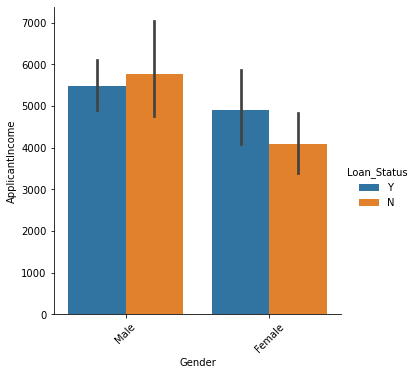

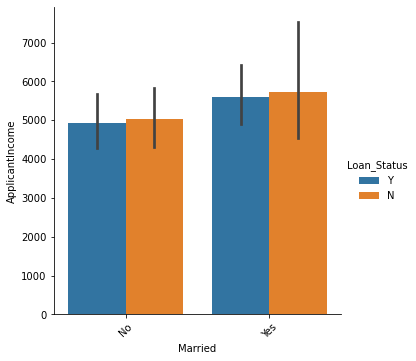

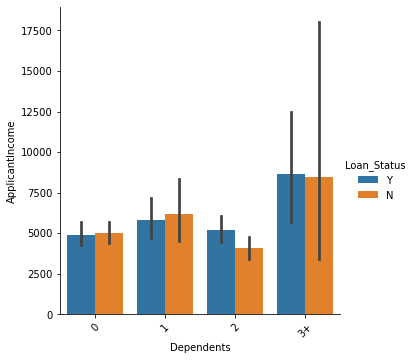

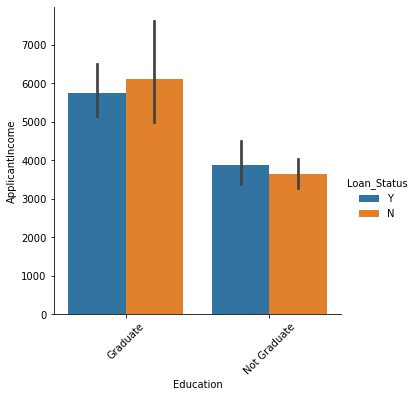

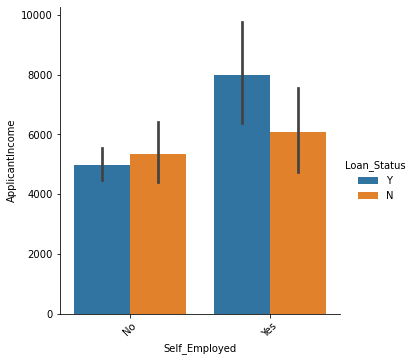

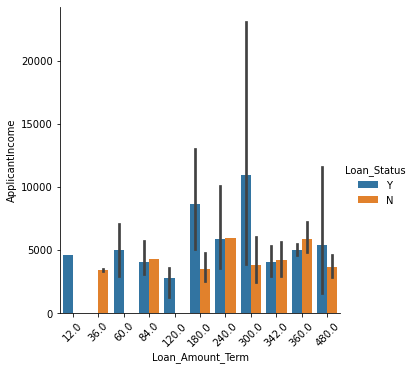

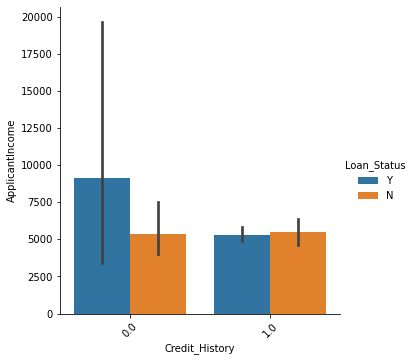

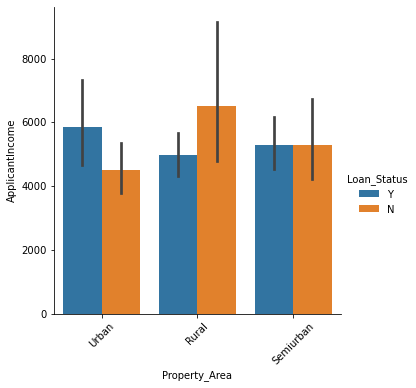

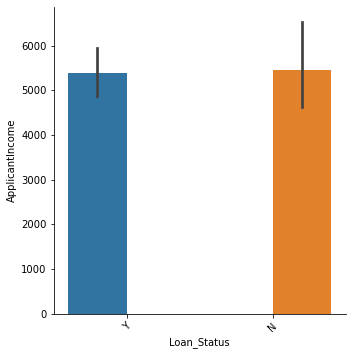

In [90]:
for col in df1.columns:
    sns.catplot(x=col,y='ApplicantIncome',hue="Loan_Status",data=df,kind="bar")
    plt.xticks(rotation=45)

here we have done multivariate analysis

1.maximum male loan applicants whose income is high , there is a high chance of being' loan status is no .

2.loan applicant's income is maximum in case of graduate , married , male persons and where the loan ammount is high , there is a high chance of being the loan status "no"

3.loan applicant's income  is high in case of the loan applicants whose dependens is maximum(3+)

4.loan applicant's income  is high who are self empolyed .

5.loan applicant's income is high whose loan ammount term is 300 and 180 and there is a high chance of being the loan status yes.

6.loan applicant's income is igh whose credit history is 0 and the chances of being loan status is yes.

7.loan applicant's income is high whose property area is in rural area and in the maximum cases loan status is no.loan applicants whose property area is in urban area , and the chances of being loan status is yes.

In [94]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

we can see some collumns are object or catagorical collumns so we have to encode these collumns. Here we will use ordinal encoder to encode the catagorical collumns.

In [96]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= oe.fit_transform(df[i].values.reshape(-1,1))

In [97]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [99]:
import scipy
from scipy.stats import zscore

In [100]:
z= np.abs(zscore(df))
print(z)

       Gender   Married  Dependents  Education  Self_Employed  \
0    0.472343  1.372089    0.737806   0.528362       0.392601   
1    0.472343  0.728816    0.253470   0.528362       0.392601   
2    0.472343  0.728816    0.737806   0.528362       2.547117   
3    0.472343  0.728816    0.737806   1.892641       0.392601   
4    0.472343  1.372089    0.737806   0.528362       0.392601   
..        ...       ...         ...        ...            ...   
609  2.117107  1.372089    0.737806   0.528362       0.392601   
610  0.472343  0.728816    2.236021   0.528362       0.392601   
611  0.472343  0.728816    0.253470   0.528362       0.392601   
612  0.472343  0.728816    1.244745   0.528362       0.392601   
613  2.117107  1.372089    0.737806   0.528362       2.547117   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991           0.554487    0.000000          0.279851   
1           0.134412           0.038732    0.219273          0.279851   


In [101]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


df_new=df[(z<3).all(axis=1)]
df_new.shape

In [103]:
df.shape


(614, 12)

In [104]:
dataloss = (614-577)/614*100
dataloss

6.026058631921824

we have used z score method to remove outliers,  we can see that we will loose 6% data if we remove outliers .

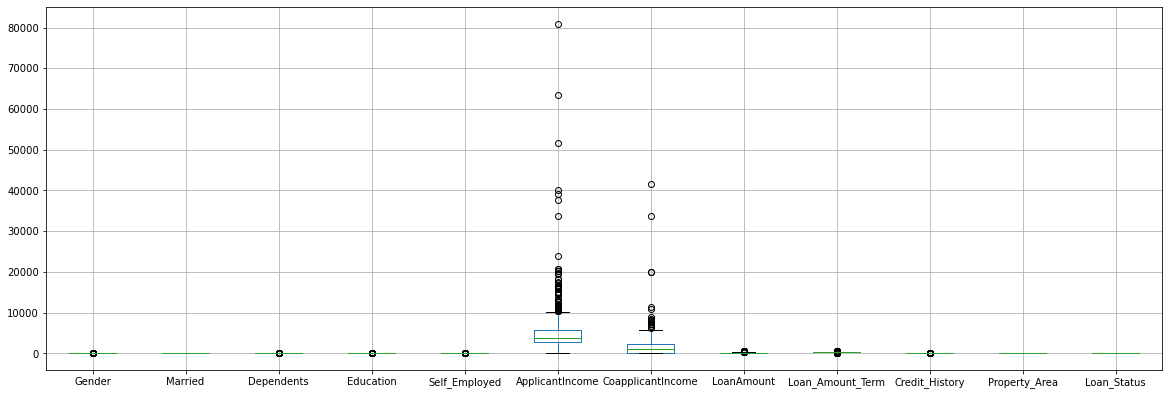

In [106]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

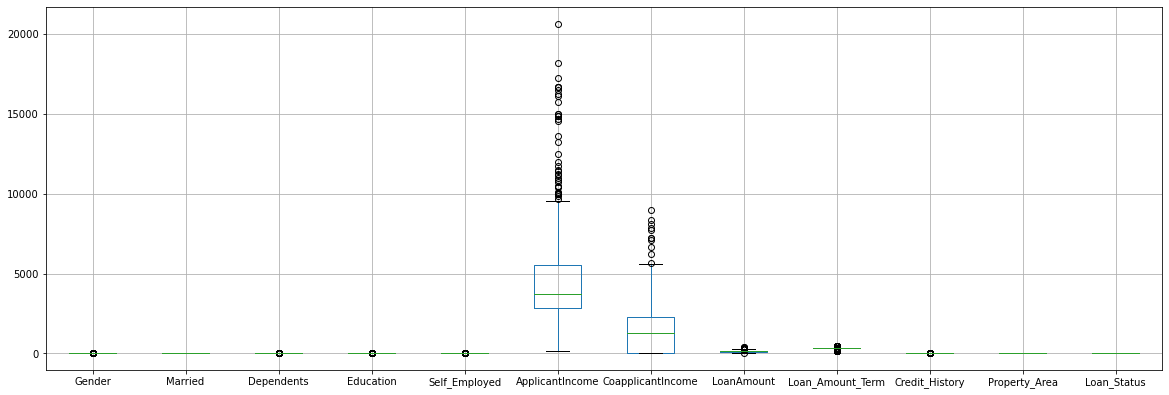

In [107]:
df_new.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [108]:
df_new.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,1420.807487,136.048644,347.604853,0.850953,1.031196,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1651.545352,56.193532,51.819095,0.356444,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


here we can see the statistical description of the dataset .

<AxesSubplot:>

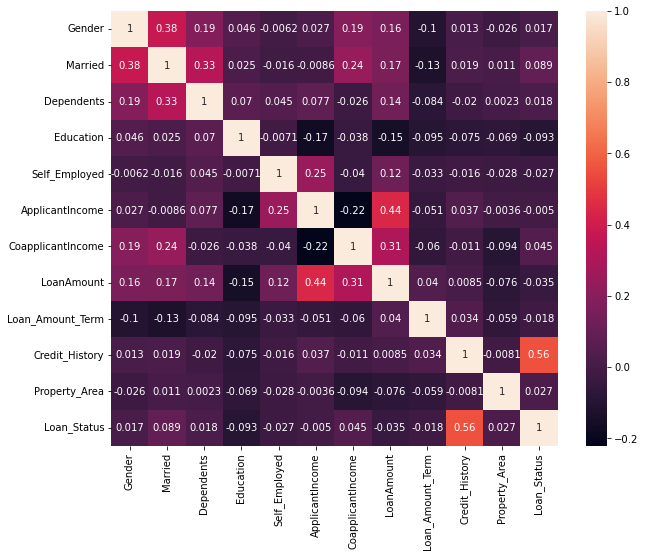

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot =True)

In [113]:
x=df_new.drop(["Loan_Status"],axis=1)
y=df_new["Loan_Status"]
print(x.shape)
print(y.shape)

(577, 11)
(577,)


here we have splitted the data set in input and output dataset 

In [114]:
from sklearn.preprocessing import power_transform
xt=power_transform(x, method="yeo-johnson")
xt=pd.DataFrame(xt)
xt.columns = x.columns
xt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142609,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142609,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.142609,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142609,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142609,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.142609,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.559206,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.142609,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.142609,0.418513,1.194806


here we have used power transform method to remove the skewness.

In [115]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
def calc_vif(xt):
    vif = pd.DataFrame()
    vif["variables"] = xt.columns
    vif["V_I_F"] = [variance_inflation_factor(xt.values,i) for i in range(xt.shape[1])]
    return(vif)

In [117]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

            variables     V_I_F
0              Gender  1.219265
1             Married  1.433527
2          Dependents  1.184111
3           Education  1.065654
4       Self_Employed  1.055700
5     ApplicantIncome  1.764886
6   CoapplicantIncome  1.577502
7          LoanAmount  1.546562
8    Loan_Amount_Term  1.048603
9      Credit_History  1.008795
10      Property_Area  1.025506


5     1.764886
6     1.577502
7     1.546562
1     1.433527
0     1.219265
2     1.184111
3     1.065654
4     1.055700
8     1.048603
10    1.025506
9     1.008795
Name: V_I_F, dtype: float64

here we can see that vif for all the features is under 10 so no need to remove any features.

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(xt)
xc=pd.DataFrame(xc)
xc.columns=xt.columns
xc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142609,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142609,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.142609,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142609,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142609,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.142609,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.559206,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.142609,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.142609,0.418513,1.194806


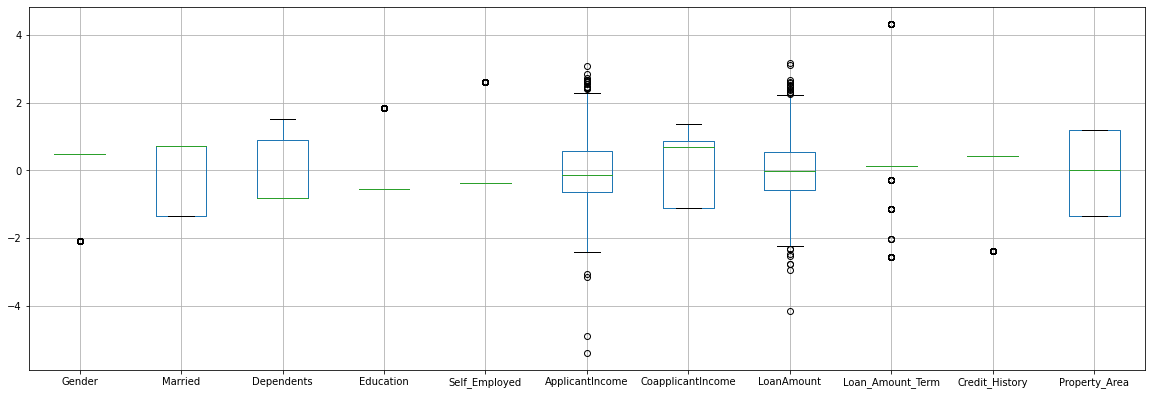

In [120]:
xc.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [121]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrainw,ytrainw=smote.fit_resample(xc,y)

In [122]:
ytrainw.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

here we have used smote method to balance the data now or data is balanced.

In [123]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [124]:
xc.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

here we can see not much skewness is present in the features.

now our dataset is clean , balanced . eda process is done now we have to use different classification models for prediction .

In [125]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [130]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    predknc=knc.predict(x_test)
    acc=accuracy_score(y_test,predknc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.83125 on random state 135


In [133]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=135)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
acc=accuracy_score(y_test,predknc)
acc

0.83125

In [134]:
score=cross_val_score(knc,xtrainw,ytrainw,cv=5)
score.mean()

0.7399764150943395

In [126]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.80625 on random state 78


In [135]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=78)
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc=accuracy_score(y_test,predlr)
acc

0.80625

In [136]:
score=cross_val_score(lr,xtrainw,ytrainw,cv=5)
score.mean()

0.7122955974842766

In [127]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.85 on random state 135


In [138]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=135)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
acc=accuracy_score(y_test,preddtc)
acc

0.8375

In [140]:
score=cross_val_score(dtc,xtrainw,ytrainw,cv=5)
score.mean()

0.7726965408805032

In [128]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtce=DecisionTreeClassifier(criterion="entropy")
    dtce.fit(x_train,y_train)
    preddt=dtce.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.85625 on random state 196


In [141]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=196)
dtce=DecisionTreeClassifier(criterion="entropy")
dtce.fit(x_train,y_train)
preddtce=dtce.predict(x_test)
acc=accuracy_score(y_test,preddtce)
acc

0.86875

In [142]:
score=cross_val_score(dtce,xtrainw,ytrainw,cv=5)
score.mean()

0.7639465408805032

In [129]:
maxacc=0
maxrs=0
from sklearn.ensemble import RandomForestClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    rfc=RandomForestClassifier(n_estimators=200)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.90625 on random state 150


In [143]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=196)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
acc

0.89375

In [144]:
score=cross_val_score(rfc,xtrainw,ytrainw,cv=5)
score.mean()

0.8392610062893082

In [132]:
maxacc=0
maxrs=0
from sklearn.svm import SVC
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc=accuracy_score(y_test,predsvc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.85625 on random state 86


In [146]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=86)
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
acc=accuracy_score(y_test,predsvc)
acc

0.85625

In [147]:
score=cross_val_score(svc,xtrainw,ytrainw,cv=5)
score.mean()

0.7387185534591195

from various models random forest classifier has given the best result and the cross validation score is comparatively good for this model so we have decided to use this model for hyper tuning and getting the score .

In [148]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"],"max_depth":[0,1,2,3,4,5,6,7,8],"criterion":["gini","entropy"]}
gscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [149]:
gscv.fit(xtrainw,ytrainw)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [150]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [151]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [152]:
gscvpred=gscv.best_estimator_.predict(x_test)

In [153]:
print(accuracy_score(y_test,gscvpred))
print(confusion_matrix(y_test,gscvpred))
print(classification_report(y_test,gscvpred))

0.9125
[[58 11]
 [ 3 88]]
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        69
         1.0       0.89      0.97      0.93        91

    accuracy                           0.91       160
   macro avg       0.92      0.90      0.91       160
weighted avg       0.92      0.91      0.91       160



In [156]:
score=cross_val_score(gscv.best_estimator_,xtrainw,ytrainw,cv=5)
score.mean()

0.8041194968553459

In [155]:
score=cross_val_score(gscv,xtrainw,ytrainw,cv=5)
score.mean()

0.8116588050314466

the accuracy score is around 91 % and cross validation score is around 81% .

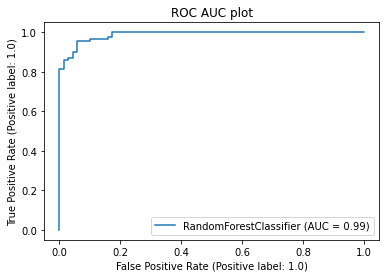

In [157]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

auc score is 99%

In [158]:
import joblib

In [159]:
joblib.dump(gscv.best_estimator_,"loan_prediction.pkl")

['loan_prediction.pkl']